### The Agent-Environment Interface

MDPs are meant to be a straightforward framing of the problem of learning from interaction to achieve a goal. The learnner and decision maker is called ***agent***. The thing it interacts with, comprising everything outside the agent, called ***environment***. These interact continually, the agent selecting actions and the environment responding to these actions and presenting new situations to the agent, The environment also gives rise to rewards, special numerical values that the agent seeks to maximize over time through its choice of actions.

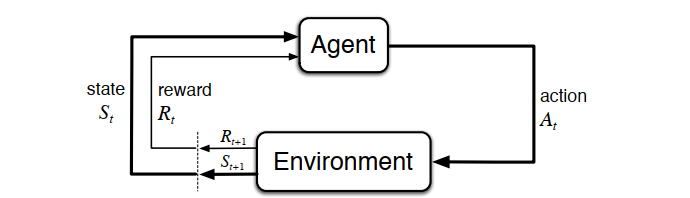

The agent and environment interact at each of a sequence of discrete time steps, $t = 0, 1, 2, 3, \cdot$. At each time step $t$, the agent receives some representation of the environment's *state*, $S_t \in \mathcal{S}$, and on that basis select an *action*, $A_t \in \mathcal{A}(S_t)$. One time step later, in part as a consequence of its action, the agent receives a *reward*, $R_{t+1} \in \mathcal{R} \subset \mathbb{R}$, and finds itself in a new state, $S_{t+1}$. The interaction between the agent and its environment at each time step is shown in the following flow:

$$S_0 \xrightarrow{A_0} R_1, S_1 \xrightarrow{A_1} R_2, S_2 \xrightarrow{A_2} R_3, \cdots$$

In finite MDPs, the sets of states, actions, and rewards ( $\mathcal{S}$, $\mathcal{A}$, and $\mathcal{R}$) all have a finite number of elements. In this case, the random variables $R_t$ and $S_t$ have well-defined discrete probability distributions dependent only on the preceding state and action. For particular values of these random variables, $s' \in \mathcal{S}$ and $r \in \mathcal{R}$, the probability of their occurrence depends only on the immediately preceding state and action:

$$p(s', r | s, a) \doteq \text{Pr}\{S_t = s', R_t = r | S_{t-1} = s, A_{t-1} = a\}$$

for all $s', s \in \mathcal{S}$, $r \in \mathcal{R}$, and $a \in \mathcal{A}(s)$. The function $p$ defines the dynamics of the MDP. And we call this formulation as ***Markov property*** or **Four-argument dynamics**.

**Note that**, $p$ specifies a probability distribution for each choice of $s$ and $a$, which:

$$\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s', r | s, a) = 1, \text{ for all } s \in \mathcal{S}, a \in \mathcal{A}(s)$$

In Markov decision process, the probability of each possible value for $S_{t+1}$ and $R_{t+1}$ depends only on the immediately preceding state and action, not on the previous states and actions. This is called the ***Markov property***, which state must include information about all aspects of the past agent-environment interaction that make a difference for the future.

From the four-argument dynamics function, $p$, one can compute anything else one might to know about the environment, such as the *state-transition probabilities*:

$$
\begin{align*}
p(s' | s, a) &\doteq \text{Pr}\{S_t = s' | S_{t-1} = s, A_{t-1} = a\} \\
&= \sum_{r \in \mathcal{R}} p(s', r | s, a)
\end{align*}
$$

We can also compute the expected rewards for state-action pairs as a two argument function $r: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$:

$$
\begin{align*}
r(s, a) &\doteq \mathbb{E}[R_t | S_{t-1} = s, A_{t-1} = a] \\
&= \sum_{r \in \mathcal{R}} r \sum_{s' \in \mathcal{S}} p(s', r | s, a)
\end{align*}
$$

And the expected rewards for state-action-nextstate triples as a three argument function $r: \mathcal{S} \times \mathcal{A} \times \mathcal{S} \rightarrow \mathbb{R}$:

$$
\begin{align*}
r(s, a, s') &\doteq \mathbb{E}[R_t | S_{t-1} = s, A_{t-1} = a, S_t = s'] \\
&= \sum_{r \in \mathcal{R}} r \frac{p(s', r | s, a)}{p(s' | s, a)}
\end{align*}
$$

The MDP framework is abstract and flexible and can be applied to many different problems in many different ways:
- The action can be low-level motor controls, such as the voltages applied to the wheels of a mobile robot.
- The state can be high-level, such as the robot's position and orientation.
- etc.

In particular, the boundary between agent and environment is typically not the same as the physical boundary of a robot or an animal body, it's more closer than that. For example, the motors and mechanical linkages of a robot and its sensing hardware should usually beconsidered parts of the environment rather than parts of the agent. The boundary should be chosen to simplify the learning problem, not to reflect the physical structure of the system being controlled.

The general rule we follow is that anything that cannot be changed arbitrarily by the agent is considered to be outside of it and thus part of its environment. We do not assume that everything in the environment is unknown to the agent. In fact, in some cases the agent may know everything about how its environment works and still face a difficult reinforcement learning task. The agent-environment boundary represents the limit of the agent's *absolute control*, not of its knowledge.

The agent–environment boundary can be located at different places for different purposes. In a complicated robot, many different agents may be operating at once, each with its own boundary.

Overall, the MDP framework is a considerable abstraction of the problem of gaol-directed learning from interraction. It proposes that whatever the details of the sensory, memory and control apparatus, and whatever objective one is trying to achive, any problem of learning goal-directed behavior can be reudced to three signals passing back and forth between an agent and its environment: states, actions, and rewards.

### Goals and Rewards

In RL, the agent's purpose is formalized using a reward signal. This scalar signal, $R_t$, represents feedback from the environment at each time step. The agent's goal is to maximize the cumulative reward over time.

Although using a reward signal to define goals may seem restrictive, it is highly versatile and widely applicable. Rewards guide the agent to align its actions with the desired objectives.

Examples:
- For teaching a robot to walk: Reward proportional to its forward motion.
- For escaping a maze: A penalty of $-1$ for each time step encourages quick escape.
- For collecting cans: Rewards for each can collected.
- For chess or checkers: $+1$ for winning, $-1$ for losing, $0$ for a draw.

### Returns and Episodes

So far we have discussed informally the objective of learning, and the agent's goal is to maximize the reward it receives in the long run. If the sequence of rewards it receives after time step $t$ is denoted $R_{t + 1}, R_{t + 2}, R_{t + 3}, \cdot$, then what precise aspect of this sequence do we wish to maximize?

In general, we seek to maximize the expected return. where return denote as $G_t$, is define as some specific function of the reward sequence:

$$G_t \doteq R_{t + 1} + R_{t + 2} + R_{t + 3} + \dots + R_{T}$$

Where $T$ is a final time step

This approach makes sense in applications in which there is a natural notion of final time step, that is, when the agent-environment interaction breaks naturally into subsequences, which we call **episodes**, such as plays a game, trip through a maze, or any sort of repeated interaction. Each episode ends in a special state called the **terminal state**, followed by a **reset to a standard starting state** or to **sample from a standard distribution of starting states**.

The episode start independent from the previous episode called **episodic tasks**. In this, we sometimes need to distinguish the set of all nonterminal states, denoted $\mathcal{S}$, from the set of all states plus the terminal state, denoted $\mathcal{S^+}$. The time of termination, $T$ is a random variable that normally vies from episode to episode.

On the other hand, in many cases the agent-environment interaction does not break naturally into identiffiable episodes, but goes on continually without limit. We call this **continuing tasks**. If the return of the formula above is a continuing tasks then the time step $T = \infty$ or $G_t = \infty_{R_T}$

The additional concept that we need is that of **discounting**. According to this approach, the agent tries to select actions so that the sum of the discounted rewards it receives over the future is maximized. In particular, it chooses $A_t$ to maximize the expected **discounted** return:

$$G_t \doteq R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \cdots = \sum_{k = 0}^\infty \gamma^k R_{t + k + 1}$$

Where:
- $0 \leq \gamma \leq 1$: discount rate

The discount rate determines the present value of future rewards: a reward received $k$ time steps in the future is worth only $\gamma^{k - 1}$ times what iit would be if it were received immediately. 
- If $\gamma < 1$, the infinite sum in $G_t$ has a finite value as long as the reward sequence $\{R_k\}$ is bounded.
- If $\gamma = 0$, the agent is "myopic" - lack of imagination, foresigh; it only maximizing immediate rewards. If each of agent action happened to influence only the immediate reward, not future then the agent will maximize $G_t$ by separately maximizing each $R_t$.
- If $\gamma \approxeq 1$ the return objective takes future rewards into account more strongly, which more "smarter".

Returns at successive time steps are related to each other in a way that is important for the theory and algorithms of RL:

$$
\begin{align*}
G_t &\doteq R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \gamma^3 R_{t + 4} + \cdots \\
&= R_{t + 1} + \gamma (R_{t + 2} + \gamma R_{t + 3} + \gamma^2 R_{t + 4} + \cdots) \\
&= R_{t + 1} + \gamma G_{t + 1}
\end{align*}
$$

This work for all time steps $t < T$, even if termination occurs at $t + 1$, provided we define $G_T = 0$.

Also note that $G_t$ always return a finite. For example:

$$G_t = \sum_{k = 0}^\infty \gamma^k = \frac{1}{1 - \gamma}$$

### Unified Notation for Episodic and Continuing Tasks

In the preceding section we described two kinds of reinforcement learning tasks, one in which the agent-environment interaction naturally breaks down into a sequence of separate episodes (episodic tasks), and one in which does not (continuing tasks). The first case is mathematically simpler because each action affects only the finite number of rewards subsequently received during the episode.

To be precise about episodic tasks requires some additional notation. Rather than one long sequence of time steps, we need to consider a series of episodes, each of which consists of a finite sequence of time steps. We number the time steps of each starting anew from zero. Therefore, we have to refer not just to $S_t$, the state representation at time $t$, but to $S_{t, i}$, the state representation at time $t$ of episode $i$ (The same thing as $A_{t, i}$, $R_{t, i}$, $\pi_{t, i}$, $T_i$, etc.)

However, it turns out that when we discuss episodic tasks we almost never have to distinguish between different episodes. In practice, we almost always abuse notation slightly by dropping the explicit reference to episode number. That is, we write $S_t$ to refer to $S_{t, i}$, and so on.

We need other convention to obtain a single notation that covers both episodic and continuing tasks. We have defined the return as a sum over a finite number of terms in one case:

$$G_t \doteq R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \cdots + \gamma^{T - t - 1} R_T$$

And as a sum over an infinite number of terms in the other case:

$$G_t \doteq R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \cdots$$

These two can be unified by considering episode termination to be entering of a special *absoring state* that transitions only to itself and that generates only rewards of zero. For example, consider this diagram:

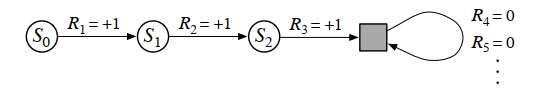

Here the solid square represents the special absorbing state corresponding to the end of an episode. Starting from $S_0$, we get the reward sequence: $+1, +1, +1, 0, 0, \cdots$. The sum over first $T$ rewards (here $T = 3$) or over the full infinite sequence is the same.

This remains true even if we implement discounting. Thus we can define the return, according to $G_t$, as:

$$G_t \doteq R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \cdots + \gamma^{T - t - 1} R_T$$

using the convention of omitting episode numbers when they are not needed, and including the possibility that $\gamma = 1$ if the sum remains defined (because all episodes terminate). Then we can write

$$G_t \doteq \sum_{k = t + 1}^T \gamma^{k - t - 1} R_k$$

Including possibility that $T = \infty$ or $\gamma = 1$ (not both)

### Policies and Value Functions

Almost all reinforcement learning algorithms involve *value functions* - functions of states (or of state-action pairs) that estmate *how* good it is for the agent to be in a given state (or how good it is to perform a given action in a given state). The notion of "how good" here is defined in terms of future rewards that can be expected, or to be precise, in terms of expected return. Of course the rewards the agent can expect receive in the future depend on what actions it will take. Accordingly, value functions are defined with respect to particular ways of acting, called polices.

Formally, a *policy* is a mapping from states to probabilities of selecting each possible action. If the agent is following policy $\pi$ at time $t$, then $\pi(a|s)$ is the probability that $A_t = a$ if $S_t = s$. Like $p$, $\pi$ is an ordinary function; the $|$ in the middle merely reminds us that it defines a probability distribution over $a \in \mathcal{A}(s)$ for each $s \in \mathcal{S}$.

The *value function* of a state $s$ under a policy $\pi$, denoted $v_\pi(s)$, is the expected return when starting in $s$ and following $\pi$ thereafter. For MDPs, we can define $v_\pi$ formally by:

$$v_\pi(s) \doteq \mathbb{E}_\pi[G_t | S_t = s] = \mathbb{E}_\pi \left[ \sum_{k = 0}^\infty \gamma^k R_{t + k + 1} | S_t = s \right], \quad \forall s \in \mathcal{S}$$

where $\mathbb{E}_\pi$ denotes the expectation of the expected return when following policy $\pi$. The value function of a state $s$ is the expected return starting from $s$, and then following the policy $\pi$.

Note: The value of the terminal state, if any, is alway **zero**.

We call the function $v_\pi$ the **state-value function for policy $\pi$**

Similarly, we define the *value function* of taking action $a$ in state $s$ under a policy $\pi$, denoted $q_\pi(s, a)$, as the expected return starting from $s$, taking the action $a$, and then following policy $\pi$:

$$q_\pi(s, a) \doteq \mathbb{E}_\pi[G_t | S_t = s, A_t = a] = \mathbb{E}_\pi \left[ \sum_{k = 0}^\infty \gamma^k R_{t + k + 1} | S_t = s, A_t = a \right], \quad \forall s \in \mathcal{S}, a \in \mathcal{A}(s)$$

We call the $q_\pi$ the **action-value function for policy $\pi$**

The value function $v_\pi$ and $q_\pi$ can be estimated from experience. For example, if an agent follows policy $\pi$ and maintains an average, for each state encountered, of the actual returns that have followed that state, then the average will converge to the state's value, $v_\pi(s)$, as the number of times that state is encountered approaches infinity. If separate averages are kept for each action taken in each state, then these averages will similarly converge to the action values, $q_\pi(s, a)$. We call this kind of learning **Monte Carlo methods**.

If there are very many states, then it may not be practical to keep separate averages for each state individually. Instead, the agent would have to maintain $v_\pi(s)$ and $q_\pi(s, a)$ as parmeterized function (with fewer parameters than states) and adjust the parameters to better match the observed returns. This can also produce accurate estimates, although much depends on the nature of the parameterized function approximator.

For any policy $\pi$ and any state $s$, the following consistency condition must be satisfied:

$$
\begin{align*}
v_\pi(s) &= \mathbb{E}_\pi[G_t | S_t = s] \\
&= \mathbb{E}_\pi[R_{t + 1} + \gamma G_{t + 1} | S_t = s] \\
&= \sum_a \pi(a|s) \sum_{s', r} p(s', r | s, a) [r + \gamma \mathbb{E}_\pi[G_{t + 1} | S_{t + 1} = s']] \\
&= \sum_a \pi(a|s) \sum_{s', r} p(s', r | s, a) [r + \gamma v_\pi(s')]
\end{align*}
$$

where it is implicit that the actions, $a$, are taken from the set $\mathcal{A}(s)$, the states, $s'$, are taken from the set $\mathcal{S}$ (or from $\mathcal{S^+}$ in the case of an episodic problem), and the rewards, $r$, are taken from the set $\mathcal{R}$.

**Note:** 
- In the last equation, we have merged the two sums, one over all the values of $s'$ and one over all the values of $r$, into a single sum over all possible values of both. We use this kind of merged sum often to simplify formulas.
- The final expression can be read easily as an expected value. It's really a sum over all values of the three variables, $a$, $s'$, and $r$. For each trple, we compute its probability, $\pi(a|s)p(s', r | s, a)$, weight the quantity in brackets by that probability, then sum over all possibilities to get an expected value.

Also this equation is called the **Bellman equation for $v_\pi$**. It expresses a relationship between the value of a state and the values of its successor states. Take a look at the small diagram below:

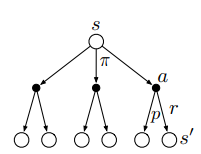

Each open circle represents a state and each solid circle represents a state-action pair. Starting from state $s$, the root node at the top, the agent could take any of some set of actions - three as shown - based on its policy $\pi$. From each of these, the environment could respond with one of several next states, $s'$, along with a reward , $r$, depending on its dynamics given by the function $p$.

The Bellman equation averages over all the possibilities, weighting eaach by its probability of occurring. It states that the value of the start state must equal the (discounted) value of the expected next state, plus the reward expected along the way.

We called this diagram as **Bellman equation backup diagram**. It shows how the value of a state can be backed up by considering the possible next states and rewards.